# Principal Component Analysis

In [2]:
# Unsupervised Statistical Technique - Relations between variables.
# Several orthogonal lines of best fit (right angles)
# - - the lines are actually perpendicular to each other in n-dimensional space

# N-dimensional Space is the variable sample space
# - - there are as many dimensions as there are variables, so in a data set with 4 variables
# - - The same space is 4 dimensional

In [5]:
# CHALLENGE: Interpret the Components
# This is more for analysis of data

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()

In [11]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [12]:
# What components are the most important to explain the variance in this dataset?

In [15]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# SCALING

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_df = scaler.transform(df)

# PCA

In [28]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=3)

In [59]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
x_pca = pca.transform(scaled_df)

In [61]:
scaled_df.shape

(569, 30)

In [62]:
x_pca.shape

(569, 3)

In [77]:
pca_df = pd.DataFrame(x_pca, columns=['PCA%i' % i for i in range(3)])

# PLOT PCA

Text(0,0.5,'Second Principal Component')

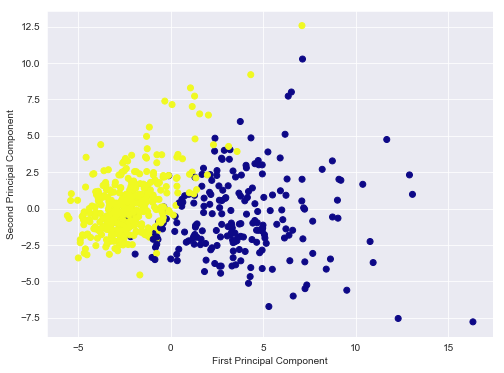

In [63]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=cancer.target, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# WHAT DOES IT MEAN???

In [64]:
# Components represent combinations of the original features

In [65]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385714, -0.05970605, -0.21518136, -0.23107671,  0.186113  ,
         0.15189164,  0.06016541, -0.03476747,  0.19034878,  0.36657552,
        -0.10555216,  0.08997964, -0.08945723, -0.15229263,  0.20443047,
         0.23271586,  0.19720729,  0.13032155,  0.18384801,  0.280092  ,
        -0.21986639, -0.0454673 , -0.19987844, -0.21935187,  0.17230432,
         0.14359315,  0.09796412, -0.00825724,  0.14188332,  0.27533946],
       [-0.00853109,  0.06454826, -0.00931421,  0.02869939, -0.10429124,
        -0.07409255,  0.00273224, -0.02556466, -0

In [66]:
df_comp = pd.DataFrame(pca.components_, columns=cancer.feature_names)

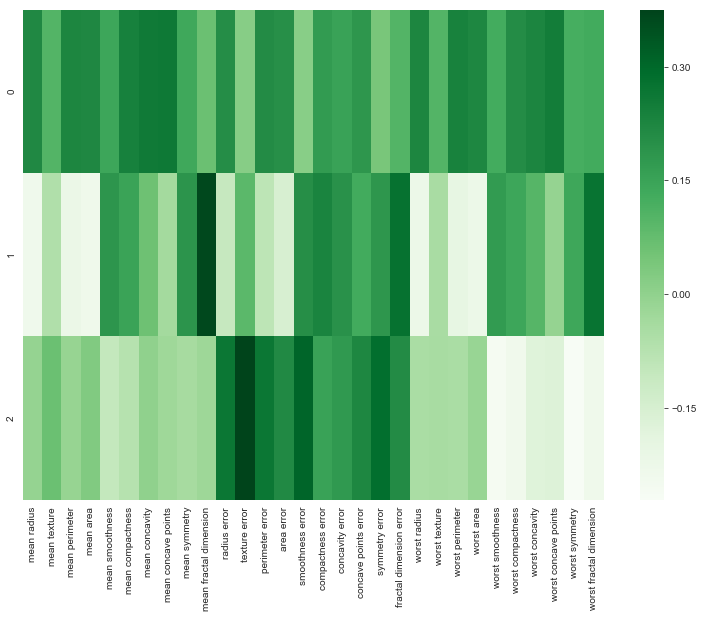

In [67]:
plt.figure(figsize=(13,9))
sns.heatmap(df_comp, cmap='Greens')

In [68]:
from mpl_toolkits.mplot3d import Axes3D

No handles with labels found to put in legend.


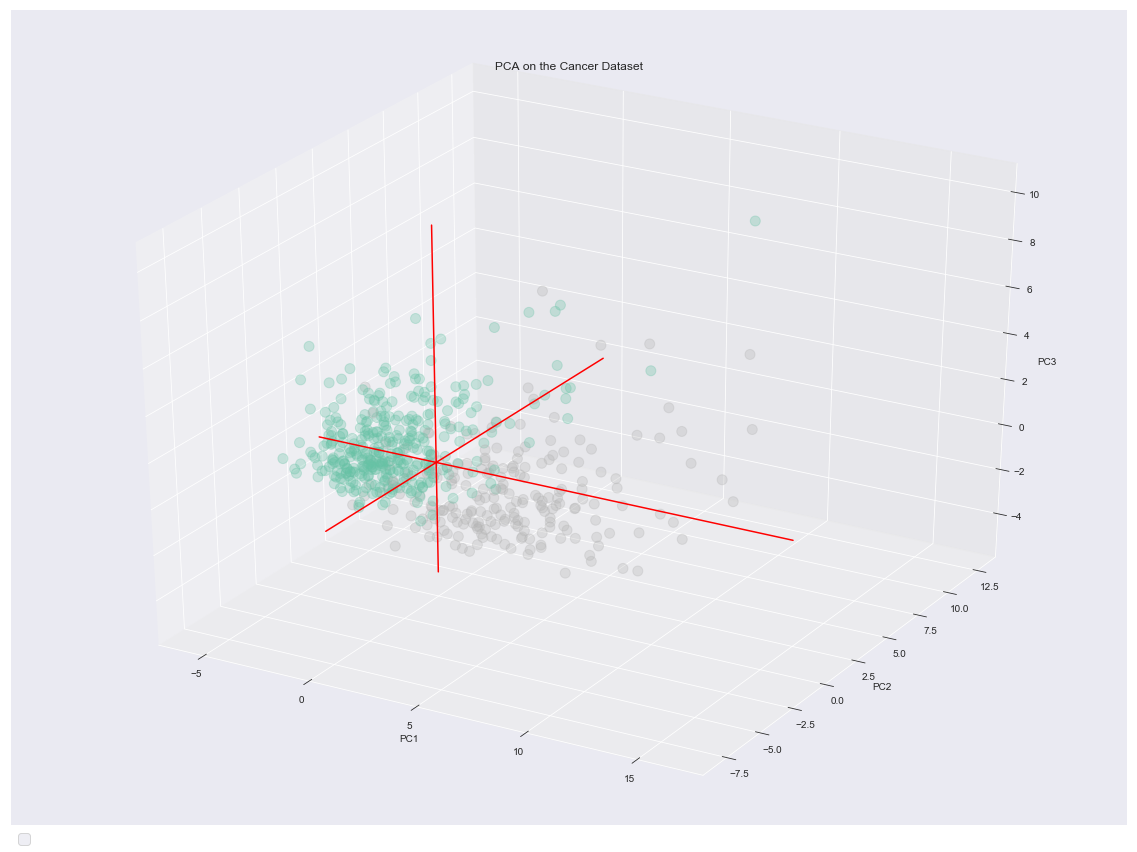

In [112]:
my_color=cancer.target

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PCA0'], pca_df['PCA1'], pca_df['PCA2'], c=my_color, cmap="Set2_r", s=100, alpha=0.3)

xAxisLine = ((min(pca_df['PCA0']), max(pca_df['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')

yAxisLine = ((0, 0), (min(pca_df['PCA1']), max(pca_df['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ((0, 0), (0,0), (min(pca_df['PCA2']), max(pca_df['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Cancer Dataset")

plt.legend(loc='upper left', numpoints=1, ncol=1, fontsize=15 , bbox_to_anchor=(0, 0))


# INTERPRET THIS 

https://onlinecourses.science.psu.edu/stat505/node/54/